## Part 1

In [1]:
import pandas as pd
import numpy as np
import ast
import re
from collections import defaultdict

### load business data and review data

In [251]:
trainSize=10000
business_train = pd.read_json('..//data//business_train.json',orient = 'records',lines = True)
review_train=pd.read_json('..//data//review_train.json',orient='records',lines=True,chunksize=trainSize)

In [3]:
business_train.shape

(154606, 11)

### first look at the data structure of business_train

category:

In [4]:
business_train.categories.iloc[:5]

0                                    Golf, Active Life
1                    Sushi Bars, Restaurants, Japanese
2                        Insurance, Financial Services
3    Plumbing, Shopping, Local Services, Home Servi...
4                           Beauty & Spas, Hair Salons
Name: categories, dtype: object

In [5]:
businessCategory=business_train.categories.map(lambda x: x.split(',') if x!=None else [])
res=defaultdict(int)
for i in businessCategory:
    for j in i:
        res[j]+=1

res=sorted(res.items(),key=lambda x:x[1],reverse=True)

By term appearance frequency, we have:

In [6]:
for i in res[:10]:
    print("{} appears {} times in the category column.".format(i[0],i[1]))
    


 Restaurants appears 33024 times in the category column.
 Shopping appears 19337 times in the category column.
 Food appears 17582 times in the category column.
Restaurants appears 14482 times in the category column.
 Home Services appears 11677 times in the category column.
 Beauty & Spas appears 10936 times in the category column.
 Health & Medical appears 10210 times in the category column.
 Local Services appears 8449 times in the category column.
 Nightlife appears 8242 times in the category column.
 Bars appears 7334 times in the category column.


In this document, we mainly focus on the Restaurants, the analysis logic can also be applied on other types of business entities.

### filter all the Chinese Restaurants (let's do something simple first) 

### we change the filter function to read zihanz's topic model's contents

In [241]:
#business_train=business_train[business_train.categories.map(lambda x:"Restaurants" in x and "Chinese" in x if x else False)]
#business_train=business_train[business_train.categories.map(lambda x:"Restaurants" in x  if x else False)]



id=pd.read_csv("../data/id.txt",header=None)
id=id[0]
topic=pd.read_csv("../data/yaoshen.csv")
res=[]
for i in range(topic.shape[0]):
    if topic.iloc[i,2] in id:
        res.append([topic.iloc[i,2],topic.iloc[i,10],topic.iloc[i,11],topic.iloc[i,12],topic.iloc[i,13]])
topic        

,Unnamed: 0,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,fastfood,bars,japan,asian
0,0,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",23732,"['sushi_bars', 'japanese']",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,0,0,1,0
1,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",50474,"['breakfast_&_brunch', 'mexican', 'tacos', 'te...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,1,0,0,1
2,2,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",177055,"['italian', 'pizza', 'chicken_wings']",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,1,0,0,0
3,3,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",93176,['italian'],Las Vegas,NaN,0,36.100016,-115.128528,Carluccio's Tivoli Gardens,1,0,0,0
4,4,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",24340,"['sandwiches', 'salad', 'burgers', 'comfort_fo...",Pittsburgh,NaN,1,40.496177,-80.246011,Marathon Diner,1,0,0,0
5,5,"{'BikeParking': 'True', 'BusinessParking': ""{'...",143668,"['mexican', 'patisserie/cake_shop', 'bars', 'n...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,0,1,0,1
6,6,"{'BusinessParking': ""{'garage': False, 'street...",109616,"['nightlife', 'breakfast_&_brunch', 'vegan', '...",Toronto,"{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...",0,43.660494,-79.432099,The Steady Cafe & Bar,1,1,0,0
7,7,"{'BusinessParking': ""{'garage': False, 'street...",105372,"['chinese', 'dim_sum']",Calgary,NaN,0,51.081162,-113.993474,Pearl Garden,0,0,0,1
8,8,"{'Alcohol': ""u'full_bar'"", 'Caters': 'False', ...",167387,"['breakfast_&_brunch', 'bars', 'modern_europea...",Toronto,"{'Thursday': '18:0-2:0', 'Friday': '18:0-2:0',...",0,43.655420,-79.413352,Mad Crush Wine Bar,1,1,0,0
9,9,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...",75751,['fish_&_chips'],Newmarket,NaN,1,44.058765,-79.429115,J's Fish & Chips,0,0,0,0


In [242]:
def extract_from_topic(colIndex,data):
    res=[]
    for i in range(len(data)):
        if data[i][colIndex]==1:
            res.append(data[i][0])
    return res

In [246]:
fourTopicIdList=[]
for i in range(1,5):
    fourTopicIdList.append(extract_from_topic(i,res))

In [385]:
for i in range(1,4):
    business_train=business_train[business_train.business_id.isin(fourTopicIdList[i])]
    break

#business_train=business_train[business_train.categories.map(lambda x:"Sushi Bars" in x and "Japanese" in x  if x else False) & business_train.city.map(lambda x: x=="Las Vegas")]

### preserve business_id, stars columns and save it to local json files

In [386]:
# count=2
# res=next(review_train).iloc[:,[0,2]]
# for reviewTrainChunk in review_train:
#     print("processing {} th chunk ...".format(count))
#     res=res.append(reviewTrainChunk.iloc[:,[0,2]])
#     count+=1
# print("finished")

In [387]:
# res.shape
# res.columns

# res=res.groupby('business_id',as_index=False).mean()

# res.to_json("average_star_by_shops.json",orient='records')

In [388]:
shop_stars=pd.read_json("average_star_by_shops.json",orient="records")

### Extract nested json data from business attribute data

In [405]:
def nestedValue(x:str):
    """judge if a string contains nested json information"""
    return re.match(u'{.*}',x)

### first extract the column names from nested json
colnames=[]
for attribute in business_train.attributes:
    if attribute==None:
        continue
    for key,value in attribute.items():
        if not nestedValue(value):
            colnames.append(key)
        else:
            for nestKey,nestValue in ast.literal_eval(value).items():
                colnames.append(nestKey)
colnames=set(colnames)

### second extract the value from nested json file
res=defaultdict(list)
count=0
for attribute in business_train.attributes:
    
    
    for i in colnames:
        res[i].append(None)
    if attribute==None:
        count+=1
        continue
    for key,value in attribute.items():
        if not nestedValue(value):
            res[key][count]=value
        else:
            for nestKey,nestValue in ast.literal_eval(value).items():
                res[nestKey][count]=nestValue
            
        
    count+=1 

attributeTrain=pd.DataFrame(res)

attributeTrain.shape

attributeTrain['business_id']=business_train.business_id.tolist()

### join business data and review rating on business_id

In [406]:
attributeTrain=attributeTrain.join(shop_stars.set_index('business_id'),on="business_id",how='left')

### data cleaning, drop columns with many NAs, convert string to category 

In [404]:
#attributeTrainReduced=attributeTrain.dropna(thresh=len(attributeTrain)*0.8, axis=1)

attributeTrainReduced=attributeTrain
attributeTrainReduced=attributeTrainReduced.drop("business_id",axis=1);


attributeTrainReduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 24 columns):
valet                       1891 non-null object
romantic                    1836 non-null object
hipster                     1828 non-null object
validated                   1891 non-null object
OutdoorSeating              1951 non-null object
upscale                     1832 non-null object
trendy                      1836 non-null object
RestaurantsTakeOut          1979 non-null object
garage                      1891 non-null object
lot                         1891 non-null object
HasTV                       1867 non-null object
Alcohol                     1878 non-null object
RestaurantsPriceRange2      2020 non-null object
casual                      1836 non-null object
RestaurantsGoodForGroups    2016 non-null object
GoodForKids                 1997 non-null object
touristy                    1836 non-null object
street                      1891 non-null object
Restaurants

convert none to np.nan

In [392]:
attributeTrainReduced.fillna(value=pd.np.nan, inplace=True)

convert 'none' to np.nan

In [393]:
for i in range(attributeTrainReduced.shape[0]):
    for j in range(attributeTrainReduced.shape[1]):
        if attributeTrainReduced.iloc[i,j]=="None":
            attributeTrainReduced.iloc[i,j]=np.nan

乱码清洗

In [394]:
for i in range(attributeTrainReduced.shape[1]):
    for j in range(attributeTrainReduced.shape[0]):
        if pd.isna(attributeTrainReduced.iloc[j,i]):
            continue
        try:
            attributeTrainReduced.iloc[j,i]=re.sub('u\'(.*)\'','\\1',attributeTrainReduced.iloc[j,i])
            attributeTrainReduced.iloc[j,i]=re.sub('\'(.*)\'','\\1',attributeTrainReduced.iloc[j,i])
        except:
            break

### try xgboost 

In [395]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(attributeTrainReduced.iloc[:,:-1]),attributeTrainReduced.iloc[:,-1], random_state=0)
colLabels=pd.get_dummies(attributeTrainReduced.iloc[:,:-1]).columns

In [396]:
# encode string class values as integers
%matplotlib inline
seed = 7

# fit model no training data
model = xgboost.XGBRegressor()
model.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],eval_metric='rmse',verbose=True)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
#print(model.feature_importances_)


nameImportancePair=[(x,y) for x,y in zip(colLabels,model.feature_importances_)]
nameImportancePair=sorted(nameImportancePair,key=lambda x:x[1],reverse=True)


[0]	validation_0-rmse:2.75158	validation_1-rmse:2.70692
[1]	validation_0-rmse:2.49579	validation_1-rmse:2.45052
[2]	validation_0-rmse:2.2674	validation_1-rmse:2.22153
[3]	validation_0-rmse:2.06383	validation_1-rmse:2.0174
[4]	validation_0-rmse:1.8826	validation_1-rmse:1.8357
[5]	validation_0-rmse:1.72166	validation_1-rmse:1.67489
[6]	validation_0-rmse:1.57891	validation_1-rmse:1.53139
[7]	validation_0-rmse:1.45301	validation_1-rmse:1.40584
[8]	validation_0-rmse:1.34218	validation_1-rmse:1.29557
[9]	validation_0-rmse:1.24506	validation_1-rmse:1.19854
[10]	validation_0-rmse:1.16027	validation_1-rmse:1.11446
[11]	validation_0-rmse:1.0865	validation_1-rmse:1.04097
[12]	validation_0-rmse:1.02282	validation_1-rmse:0.978484
[13]	validation_0-rmse:0.967103	validation_1-rmse:0.9249
[14]	validation_0-rmse:0.919476	validation_1-rmse:0.879104
[15]	validation_0-rmse:0.879179	validation_1-rmse:0.840911
[16]	validation_0-rmse:0.844946	validation_1-rmse:0.807657
[17]	validation_0-rmse:0.815332	validat

C:\Users\ykhra\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[30]	validation_0-rmse:0.678203	validation_1-rmse:0.662805
[31]	validation_0-rmse:0.675597	validation_1-rmse:0.661975
[32]	validation_0-rmse:0.67333	validation_1-rmse:0.660334
[33]	validation_0-rmse:0.670974	validation_1-rmse:0.659488
[34]	validation_0-rmse:0.66949	validation_1-rmse:0.658301
[35]	validation_0-rmse:0.668161	validation_1-rmse:0.657821
[36]	validation_0-rmse:0.666929	validation_1-rmse:0.657483
[37]	validation_0-rmse:0.665074	validation_1-rmse:0.65606
[38]	validation_0-rmse:0.664162	validation_1-rmse:0.656066
[39]	validation_0-rmse:0.663231	validation_1-rmse:0.655631
[40]	validation_0-rmse:0.662453	validation_1-rmse:0.65517
[41]	validation_0-rmse:0.661446	validation_1-rmse:0.654867
[42]	validation_0-rmse:0.660754	validation_1-rmse:0.654359
[43]	validation_0-rmse:0.659404	validation_1-rmse:0.654281
[44]	validation_0-rmse:0.658942	validation_1-rmse:0.654399
[45]	validation_0-rmse:0.658116	validation_1-rmse:0.65445
[46]	validation_0-rmse:0.657034	validation_1-rmse:0.654497
[4

In [397]:
nameImportancePair

[('hipster_False', 0.079323),
 ('garage_False', 0.07287329),
 ('street_True', 0.054892972),
 ('RestaurantsReservations_False', 0.042598225),
 ('OutdoorSeating_True', 0.033794194),
 ('trendy_True', 0.03170553),
 ('RestaurantsDelivery_True', 0.030646086),
 ('Alcohol_full_bar', 0.029470189),
 ('HasTV_True', 0.028905852),
 ('GoodForKids_False', 0.026885752),
 ('touristy_False', 0.025707649),
 ('RestaurantsGoodForGroups_False', 0.025645405),
 ('Alcohol_beer_and_wine', 0.025221238),
 ('RestaurantsGoodForGroups_True', 0.024502626),
 ('hipster_True', 0.023729168),
 ('casual_True', 0.023299247),
 ('RestaurantsPriceRange2_3', 0.023029791),
 ('RestaurantsAttire_formal', 0.022853084),
 ('RestaurantsAttire_casual', 0.022769999),
 ('RestaurantsPriceRange2_1', 0.02247697),
 ('RestaurantsReservations_True', 0.022276308),
 ('HasTV_False', 0.021582175),
 ('Alcohol_none', 0.021479314),
 ('validated_False', 0.021294618),
 ('lot_True', 0.020617986),
 ('classy_True', 0.017302444),
 ('RestaurantsTakeOut_True

In [398]:
import re
def get_important_feature(x,y):
    """
    x is a dummy feature, y is the colnames list
    return the index of columns with that feature
    """
    originFeature=re.sub("()_.*","\\1",x)
    
    index=[True if re.match(originFeature,x) else False for x in y]
    
    return index
    

### Do kruskal test on feature

In [399]:
from  scipy.stats import kruskal
def difference_test(data):
    """
    the input data is like this format: the last column is the average stars,
    other columns are attribute levels, this function will test if the attribute
    levels are significant factors. When we have two levels, we t test, else use 
    anova
    """
    # kruskal test
    
    alpha=0.1
    res=[]
    for i in range(0,data.shape[1]-1):
        res.append(data[data.iloc[:,i]==1].iloc[:,-1].values)
    if len(res)<2:
        return False
    result,pValue=kruskal(*res)
    if pValue<alpha:
        largestStar=list(map(np.mean,res))
        starIndex=sorted(range(len(largestStar)), key=lambda k: largestStar[k])
        
        level=[data.columns[x] for x in starIndex[::-1]]
        return (True,level)
    else:
        return False
                   
                

In [400]:
dummyBusiness=pd.get_dummies(attributeTrainReduced.iloc[:,:-1])

maxFeature=40

testedFeature=[]

for i in range(min(maxFeature,len(nameImportancePair))):
    
    if re.sub("()_.*","\\1",nameImportancePair[i][0]) in testedFeature:
        continue
    
    
    testedFeature.append(re.sub("()_.*","\\1",nameImportancePair[i][0]))
    
    dummyBusinessTemp=dummyBusiness.iloc[:,get_important_feature(nameImportancePair[i][0],colLabels)]
    

    dummyBusinessTemp['stars']=attributeTrainReduced.iloc[:,-1]
    
    print(difference_test(dummyBusinessTemp))

C:\Users\ykhra\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(True, ['hipster_True', 'hipster_False'])
False
(True, ['street_True', 'street_False'])
(True, ['RestaurantsReservations_True', 'RestaurantsReservations_False'])
(True, ['OutdoorSeating_True', 'OutdoorSeating_False'])
(True, ['trendy_True', 'trendy_False'])
(True, ['RestaurantsDelivery_True', 'RestaurantsDelivery_False'])
(True, ['Alcohol_beer_and_wine', 'Alcohol_full_bar', 'Alcohol_none'])
(True, ['HasTV_False', 'HasTV_True'])
(True, ['GoodForKids_False', 'GoodForKids_True'])
False
(True, ['RestaurantsGoodForGroups_False', 'RestaurantsGoodForGroups_True'])
False
(True, ['RestaurantsPriceRange2_4', 'RestaurantsPriceRange2_3', 'RestaurantsPriceRange2_1', 'RestaurantsPriceRange2_2'])
(True, ['RestaurantsAttire_dressy', 'RestaurantsAttire_casual', 'RestaurantsAttire_formal'])
False
False
(True, ['classy_True', 'classy_False'])
(True, ['RestaurantsTakeOut_False', 'RestaurantsTakeOut_True'])
(True, ['valet_True', 'valet_False'])
(True, ['romantic_True', 'romantic_False'])
(True, ['upscale_T

In [52]:
attributeTrainReduced.iloc[:,[-2,-1,0,1,2,3,4,5,6]]

,RestaurantsGoodForGroups,stars,RestaurantsReservations,NoiseLevel,touristy,divey,garage,Caters,RestaurantsPriceRange2
0,True,3.666667,True,u'average',False,False,False,True,2
1,True,4.962963,True,u'quiet',False,False,False,None,2
2,True,3.333333,True,u'average',False,False,True,False,2
3,True,4.405941,False,'quiet',False,False,False,True,1
4,True,3.540717,True,u'average',False,False,False,True,2
5,True,3.962963,False,u'quiet',False,False,False,True,2
6,True,3.860269,True,u'average',False,False,True,False,3
7,True,4.336134,True,'average',False,False,False,False,2
8,True,4.190909,True,u'average',False,False,False,False,2
9,True,3.866279,True,'average',False,False,True,False,2


In [53]:
for colName in attributeTrainReduced.columns[:-1]:
    attributeTrainReduced[colName]=attributeTrainReduced[colName].astype('category')

In [54]:
attributeTrainReduced.iloc[:,0].values

[True, True, True, False, True, ..., True, True, NaN, True, False]
Length: 174
Categories (2, object): [False, True]

### try fit a simple linear regression

In [59]:
pd.get_dummies(attributeTrainReduced).iloc[:5,:]

,stars,RestaurantsReservations_False,RestaurantsReservations_True,NoiseLevel_'average',NoiseLevel_'quiet',NoiseLevel_u'average',NoiseLevel_u'loud',NoiseLevel_u'quiet',touristy_False,touristy_True,...,intimate_True,WiFi_'free',WiFi_'no',WiFi_u'free',WiFi_u'no',WiFi_u'paid',HasTV_False,HasTV_True,RestaurantsGoodForGroups_False,RestaurantsGoodForGroups_True
0,3.666667,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
1,4.962963,0,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
2,3.333333,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,4.405941,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,3.540717,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(attributeTrainReduced).iloc[:,1:],pd.get_dummies(attributeTrainReduced).iloc[:,0],  random_state=0)

In [61]:
modelSlr = LinearRegression().fit(X_train, y_train)
pred=modelSlr.predict(X_test)
print("the score(rmse) is {}".format(np.sqrt(mean_squared_error(pred,y_test))))

the score(rmse) is 0.6256456661818444


### round the rating value and use a multioutcome logistic regression

In [ ]:
# here, we need to make continuous ylabel to be categorical variable
y_train_class=np.round(y_train)
y_test_class=np.round(y_test)
from sklearn.linear_model import LogisticRegression

modelLr=LogisticRegression(multi_class='multinomial',solver='newton-cg')
modelLr.fit(X_train,y_train_class)
pred=modelLr.predict(X_test)
print("the score is {}".format(mean_squared_error(pred,y_test_class)))
#print(modelLr.coef_)

In [87]:
# get an average ratings among all the business in this category. And define the class label to be 1 if the average rating for 
# this business is higher than the average rating in this category, otherwise 0
X,y = pd.get_dummies(attributeTrainReduced).iloc[:,1:],pd.get_dummies(attributeTrainReduced).iloc[:,0]
y_class=y>np.mean(attributeTrainReduced.stars)
y_class=[1 if x==True else 0 for x in y_class.values ]
y_class
modelLr=LogisticRegression(solver='newton-cg')
modelLr.fit(X,y_class)
print(modelLr.coef_)

[[-0.4977451   0.16185708  0.92340705 -0.22934856 -0.63533121 -0.62220048
  -0.32083807  0.23730669 -0.15087462  0.44114933 -0.35471725  0.1175023
  -0.50769874 -0.54638059  0.20814605  0.24584324 -0.39259729 -0.8377421
   0.49602767 -0.01238223 -0.3778142   0.3074479  -0.22101583  0.12715666
  -1.04841901  0.05300156 -0.15720356  0.27411772 -0.13134132  0.09128145
  -0.19831798 -0.26465377 -0.04461072  0.09607164  0.0019303  -0.11458524
  -0.01882703 -0.60756021  0.69399228 -0.42555539  0.51198746 -0.00514167
  -0.38505477 -0.29178673 -0.3746993  -0.10969679 -0.07791881 -0.61182163
   0.2216252  -0.12490205 -0.26529438  0.45054625 -0.36411418 -0.58803771
   0.67446978 -0.10508357  0.19151564  0.27551257  0.09951332 -0.32105818
   0.40749025 -0.18326747 -0.25101403  0.14220422 -0.86524822  0.4173965
   0.52707865 -0.55246849  0.06352923 -0.55199771]]


### Linear Discriminant Analysis  (different from latent dirichlet allocation topic model)
Here, we would like to select a few dimensions, each dimension is a linear combination of the business attribute, that separate the most of five classes.

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
modelLda = LinearDiscriminantAnalysis(n_components=2)

modelLda.fit(X_train,y_train_class)
temp=modelLda.transform(X_test)
print(temp)

modelLda.fit(X_train,y_train_class)
pred=modelLda.predict(X_test)
print("the score(rmse) is {}".format(np.sqrt(mean_squared_error(pred,y_test_class))))

[[ 0.92503955 -0.34141951]
 [-0.3653134   0.56697671]
 [ 0.89900815  0.35090454]
 [ 0.3860602  -1.02954962]
 [-0.54646713  1.11516086]
 [ 0.70437802  1.03446277]
 [-0.07960503  1.47285501]
 [ 0.95810149  0.03778545]
 [ 0.1386653  -0.37992288]
 [ 0.29922263  0.08666233]
 [-1.02828296 -0.53787773]
 [-0.55954651  0.31568949]
 [ 0.08125709 -0.45033303]
 [ 0.33736315  0.12511312]
 [ 0.65216664 -0.33223775]
 [ 0.91039587 -0.28603075]
 [ 0.34115722 -0.62003813]
 [ 0.26433356 -0.31394009]
 [ 0.33736315  0.12511312]
 [ 0.22282673  0.01547342]
 [ 0.13802418  0.06880669]
 [ 0.54189777 -0.14890124]
 [ 0.10524031 -0.06200658]
 [ 0.09457738 -0.4040409 ]
 [-0.57447661 -0.58718057]
 [-2.7244435  -0.17271006]
 [ 0.77781469 -0.70693279]
 [-0.27159245  0.42416896]
 [-0.18419981  0.52960303]
 [ 0.57959551  0.47202646]
 [ 0.17432115  0.11525563]
 [-0.76049212 -0.68020143]
 [ 0.10524031 -0.06200658]
 [-0.52488257  0.71767623]
 [ 0.77781469 -0.70693279]
 [ 0.81326071 -0.32956313]
 [-0.0370663   0.67180442]
 

C:\Users\ykhra\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ykhra\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [42]:
import matplotlib.pyplot as plt
X_test_transform= modelLda.transform(X_test)
target_names=[1,2,3,4,5]
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(modelLda.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange','red','blue']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2,3,4], target_names):
    plt.scatter(X_test_transform[y_test == i, 0], X_test_transform[y_test == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

explained variance ratio (first two components): [0.62116123 0.25988171]


<Figure size 640x480 with 1 Axes>

In [43]:
for i,j in zip([1,2],[3,4]):
    print(i,j)

1 3
2 4


### use randomforest to have a glimpse at feature importance

In [44]:
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline            

modelRfc = RandomForestClassifier()
modelRfc.fit(X_train, y_train_class)

pred=modelRfc.predict(X_test)
print("the score(rmse) is {}".format(np.sqrt(mean_squared_error(pred,y_test_class))))

the score(rmse) is 0.4767312946227962


C:\Users\ykhra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


the prediction is better than logistic regression

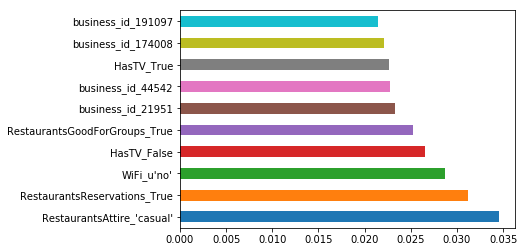

In [45]:
pd.Series(modelRfc.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh')

some variables actually make sense, so we extract a single tree from the forest to visualize it.

In [107]:
# from sklearn.tree import export_graphviz
# # Extract single tree
# estimator = modelRfc.estimators_[5]

# # Export to dot file
# export_graphviz(estimator, 
#                 out_file='tree.dot', 
#                 feature_names = X_train.columns,
                
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)
# # Convert to png
# import os
# os.system('dot -Tpng tree.dot -o tree.png')

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

### check the meaning of each variable and do variable selection

In [108]:
def edaPlot(x:list,y:list,title:str,saveFile:bool):
    import numpy as np
    import matplotlib.pyplot as plt
    """x is the attribute, y is the average stars"""
    fig,ax=plt.subplots()
    ax.bar(x,y,facecolor='blue',width=0.4)
    ax.set_xlabel("factor level")
    ax.set_ylabel("average stars")
    ax.set_ylim(3,3.7)
    ax.set_title(title)
    if saveFile:
        fig.savefig('./fig/{}'.format(title), format='png',dpi=800)


In [109]:
attributeTrainReduced.columns[:-1]

Index(['RestaurantsAttire', 'OutdoorSeating', 'GoodForKids',
       'RestaurantsTakeOut', 'RestaurantsDelivery', 'RestaurantsPriceRange2',
       'RestaurantsGoodForGroups', 'RestaurantsReservations'],
      dtype='object')

--------------------------------------------------------------------
For RestaurantsAttire,54.6% shops are u'casual', the average ratings are 3.31
For RestaurantsAttire,30.59% shops are 'casual', the average ratings are 3.39
For RestaurantsAttire,0.0% shops are nan, the average ratings are nan
For RestaurantsAttire,0.42% shops are u'dressy', the average ratings are 3.68
For RestaurantsAttire,0.25% shops are 'dressy', the average ratings are 3.59
For RestaurantsAttire,0.08% shops are u'formal', the average ratings are 4.29
For RestaurantsAttire,0.03% shops are None, the average ratings are 3.33
--------------------------------------------------------------------
For OutdoorSeating,73.94% shops are False, the average ratings are 3.37
For OutdoorSeating,9.56% shops are True, the average ratings are 3.27
For OutdoorSeating,0.0% shops are nan, the average ratings are nan
For OutdoorSeating,0.08% shops are None, the average ratings are 3.24
Shops have False value for OutdoorSeating tend to h

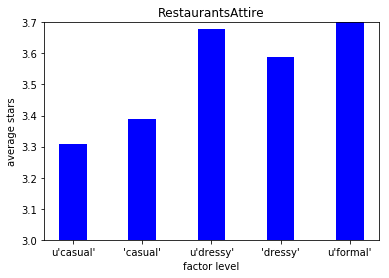

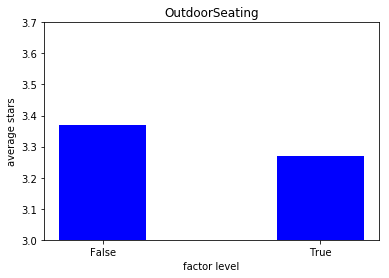

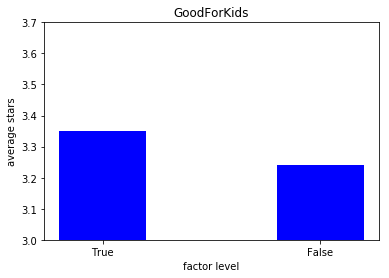

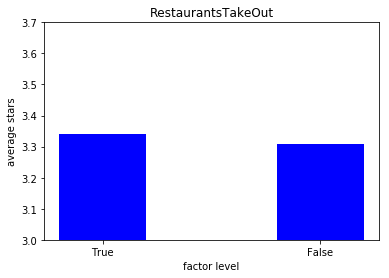

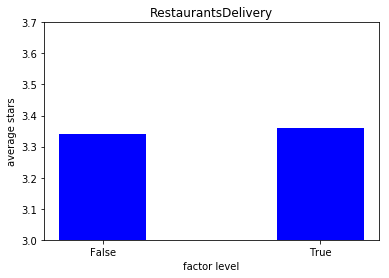

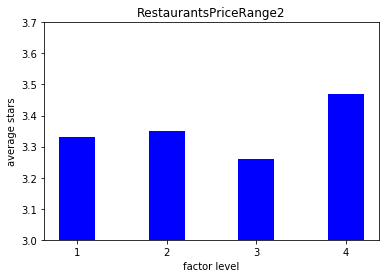

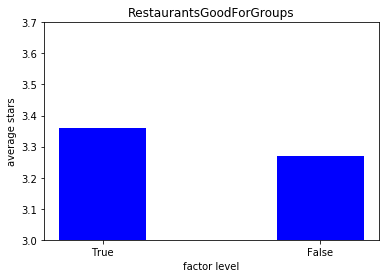

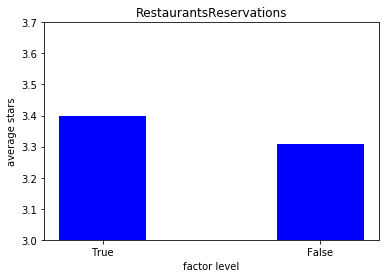

In [110]:
for i in attributeTrainReduced.columns[:-1]:
#     plot
    x=[]
    y=[]
    
    category=pd.unique(attributeTrainReduced[i])
    for subClass in category:
        if pd.isna(subClass) or pd.isnull(subClass) or subClass=="None":
            continue
        x.append(subClass)
        y.append(round(np.mean(attributeTrainReduced.stars[attributeTrainReduced[i]==subClass]),2))
    edaPlot(x,y,i,True)
#     print 
    print("--------------------------------------------------------------------")
    if (True in category and False in category) or ("True" in category and "False" in category):
        for subClass in category:
            subClassRate=round(np.sum(attributeTrainReduced[i]==subClass)/attributeTrainReduced.shape[0]*100,2)
            subClassStar=round(np.mean(attributeTrainReduced.stars[attributeTrainReduced[i]==subClass]),2)
            print("For {},{}% shops are {}, the average ratings are {}".format(i,subClassRate,subClass,subClassStar))
        if np.mean(attributeTrainReduced.stars[attributeTrainReduced[i].isin([True,"True"])])>np.mean(attributeTrainReduced.stars[attributeTrainReduced[i].isin(["False",False])]):
            print("Shops have True value for {} tend to have higher ratings".format(i))
        else:
            print("Shops have False value for {} tend to have higher ratings".format(i))
    else:
        for subClass in category:
            subClassRate=round(np.sum(attributeTrainReduced[i]==subClass)/attributeTrainReduced.shape[0]*100,2)
            subClassStar=round(np.mean(attributeTrainReduced.stars[attributeTrainReduced[i]==subClass]),2)
            print("For {},{}% shops are {}, the average ratings are {}".format(i,subClassRate,subClass,subClassStar))



Conclusion:

RestaurantsTakeOut: False is better

touristy: False is better

BusinessAcceptsCreditCards : False is better (why)

RestaurantsAttire: formal is better

NoiseLevel: quiet is better

### PCA

In [111]:
import numpy as np
from sklearn.decomposition import PCA
modelPca = PCA(n_components=2)
modelPca.fit(X_train)
print(modelPca.components_.shape)
print(modelPca.explained_variance_ratio_)
print(modelPca.components_[0,:])

(2, 29)
[0.2298001 0.1747269]
[-2.46454185e-02 -1.88435815e-03 -3.85416418e-05 -3.50463903e-02
 -4.26022838e-03 -1.26536753e-05 -7.49117024e-02  1.44339340e-04
 -4.43663708e-03  2.88632330e-02  1.19034871e-03 -1.01693426e-01
 -1.58442455e-02  7.45855541e-04 -2.99869320e-02 -4.65912293e-02
  1.91769708e-04 -1.08786416e-02  4.53731952e-01 -4.92154268e-01
 -1.45887155e-02 -2.71269698e-03 -6.61382353e-04  1.48755613e-01
 -3.85416418e-05 -2.22907317e-01  4.49064588e-01  4.25978292e-04
 -5.06074071e-01]


### Latent dirichlet allocation for review topic extraction based on tfidf vector

First step is to do data preprocessing. See our Tfidf.ipynb for more details. To make things simple, we import some packages here. When submitting the final version, pay attention not to use these packages !

In [112]:
# load supported packages
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

ModuleNotFoundError: No module named 'gensim'

load reviews about restaurants.

In [ ]:
# load a small fractio of review data
reviewTrain=next(review_train)

# make sure all reviews are about restaurants, map is a filter function to select reviews based on business_id
reviewTrain=reviewTrain[reviewTrain.business_id.map(lambda x:x in business_train.business_id)]
print("the total number of reviews we use here is {}.".format(reviewTrain.shape[0]))

do data cleaning.

In [ ]:
stemmer = SnowballStemmer('english') # use english
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text): # tokenize
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
reviewProcessed = reviewTrain.text.map(preprocess)

after data preprocessing ... looks like this.

In [ ]:
reviewProcessed[:10]

do further data cleaning.

In [ ]:
reviewDict= gensim.corpora.Dictionary(reviewProcessed)
reviewDict.filter_extremes(no_below=15, no_above=0.5, keep_n=100000) # filter extreme values, which occurs very few

In [ ]:
reviewCorpus = [reviewDict.doc2bow(review) for review in reviewProcessed]
reviewCorpus[0];

For example:

In [ ]:
reviewFirst=reviewCorpus[0]
for i in range(len(reviewFirst)):
    if i>10:
        print("......")
        break
    print("Word {} (\"{}\") appears {} time.".format(reviewFirst[i][0], 
                                                     reviewDict[reviewFirst[i][0]], 
                                                     reviewFirst[i][1]))

Second step is to apply tfidf on text column, and get a tfidf vector.

In [ ]:
from gensim import corpora, models

reviewTfidf = models.TfidfModel(reviewCorpus)
reviewTfidfVec=reviewTfidf[reviewCorpus] # convert to tfidf vector 


for review in reviewTfidfVec[0][:10]: # see the tfidf score of the first review
    print(review)


Finally, we run LDA using Bags of Words.

In [ ]:
# because we have used linear discriminant analysis above, here we call the model modelTopic
modelTopic = gensim.models.LdaMulticore(reviewCorpus, num_topics=5, id2word=reviewDict, passes=2, workers=2)

In [ ]:
for index, topic in modelTopic.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(index, topic))

We cannot manully separate the topics, that's annoying !!!!!!!!!

Why not group by stars first and then do topic modeling under each group? Let's try it. (code are exactly the same, except the input data are different.)

In [ ]:
for i in range(1,6):
    print("-----------------------------------------------------------")
    print("The following topic model is based on {} star reviews".format(i))
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
    reviewTrainFraction=reviewTrain[reviewTrain.stars==i]
    reviewProcessed = reviewTrainFraction.text.map(preprocess)
    reviewDict= gensim.corpora.Dictionary(reviewProcessed)
    reviewDict.filter_extremes(no_below=15, no_above=0.5, keep_n=100000) # filter extreme values, which occurs very few
    reviewCorpus = [reviewDict.doc2bow(review) for review in reviewProcessed]
    reviewCorpus[0]
#     reviewFirst=reviewCorpus[0]
#     for i in range(len(reviewFirst)):
#         print("Word {} (\"{}\") appears {} time.".format(reviewFirst[i][0], 
#                                                          reviewDict[reviewFirst[i][0]], 
#                                                          reviewFirst[i][1]))

    reviewTfidf = models.TfidfModel(reviewCorpus)
    reviewTfidfVec=reviewTfidf[reviewCorpus] # convert to tfidf vector 
#     for review in reviewTfidfVec[0]: # see the tfidf score of the first review
#         print(review)

    modelTopic = gensim.models.LdaMulticore(reviewCorpus, num_topics=3, id2word=reviewDict, passes=2, workers=2)
    for index, topic in modelTopic.print_topics(-1):
        print('Topic: {} \nWords: {}'.format(index, topic))


Let's see some reviews from 1 star to 5 star, and see if the topic makes some sense.

In [ ]:
for index in range(5):
    print("----------------------------------------------------------------------------------------------")
    print(reviewTrain.text[reviewTrain.stars==1].iloc[index])

### EDA for other business data outside of business attributes

In [ ]:
business_train.columns